<a href="https://colab.research.google.com/github/MarcosRobles20/MarcosRobles20/blob/main/brainstroke_rna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>  Brain Stroke Prediction </h1>

In [9]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tree

In [10]:
#importar datos
df = pd.read_csv('brain_stroke.csv')
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [11]:
# Mezclar el dataset
df = df.sample(frac=1, random_state=0).reset_index(drop=True)


In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,40.0,0,0,Yes,Govt_job,Rural,110.60,33.3,formerly smoked,0
1,Female,78.0,0,0,Yes,Self-employed,Urban,234.06,33.7,never smoked,0
2,Male,14.0,0,0,No,Self-employed,Rural,72.28,19.0,Unknown,0
3,Female,20.0,0,0,No,Private,Urban,89.03,26.6,smokes,0
4,Male,3.0,0,0,No,children,Rural,110.20,21.8,Unknown,0


In [13]:
#longitud de la base de datos
len(df)

4981

In [14]:
df.shape

(4981, 11)

In [15]:
#mostrar valor mas bajo y alto de age
print(df['age'].min())
print(df['age'].max())


0.08
82.0


In [16]:
#mostrar valores unicos de la columna gender
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

# Limpieza de Datos:
Los datos recopilados a menudo contienen
errores, valores atípicos o datos faltantes que pueden afectar
negativamente el análisis. En esta etapa, se realiza una limpieza de datos
rigurosa para identificar y corregir estos problemas. Esto implica eliminar
duplicados, rellenar valores faltantes y resolver discrepancias.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Podemos observar que la columna "bmi" tiene valores faltantes, por lo que procedemos a rellenarlos con la media de los valores de la columna.

In [18]:
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


# Transformación de Datos:
A menudo, es necesario realizar
transformaciones en los datos para que sean adecuados para el análisis.
Esto puede incluir la normalización de datos, la creación de nuevas
características derivadas o la codificación de variables categóricas. El
objetivo es preparar los datos para su posterior análisis.

In [20]:
df['gender'].replace(['Male','Female'],[0,1],inplace=True)
df['gender'].head()

0    1
1    1
2    0
3    1
4    0
Name: gender, dtype: int64

In [21]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'Unknown', 'smokes'],
      dtype=object)

In [22]:
df['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],[0,1,2,3],inplace=True)
df['smoking_status'].head()

0    0
1    1
2    3
3    2
4    3
Name: smoking_status, dtype: int64

In [23]:
df.insert(2,'age_band', np.zeros)

In [24]:
df.loc[df['age']<=16,'age_band']=0
df.loc[(df['age']>16)&(df['age']<=32),'age_band']=1
df.loc[(df['age']>32)&(df['age']<=48),'age_band']=2
df.loc[(df['age']>48)&(df['age']<=64),'age_band']=3
df.loc[df['age']>64,'age_band']=4
df.drop(columns= "age", inplace=True)
df["age_band"]=df['age_band'].astype(str).astype(int)
df.head()

,gender,age_band,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,2,0,0,Yes,Govt_job,Rural,110.60,33.3,0,0
1,1,4,0,0,Yes,Self-employed,Urban,234.06,33.7,1,0
2,0,0,0,0,No,Self-employed,Rural,72.28,19.0,3,0
3,1,1,0,0,No,Private,Urban,89.03,26.6,2,0
4,0,0,0,0,No,children,Rural,110.20,21.8,3,0


In [25]:
# apply normalization techniques on Columns
column = 'avg_glucose_level'
column2 = 'bmi'
df[column] = df[column] /df[column].abs().max()
df[column2] = df[column2] /df[column2].abs().max()

# view normalized data
display(df[column], df[column2])

0       0.407007
1       0.861338
2       0.265990
3       0.327629
4       0.405535
          ...   
4976    0.780231
4977    0.288290
4978    0.826636
4979    0.395562
4980    0.332009
Name: avg_glucose_level, Length: 4981, dtype: float64

0       0.680982
1       0.689162
2       0.388548
3       0.543967
4       0.445808
          ...   
4976    0.685072
4977    0.664622
4978    0.875256
4979    0.603272
4980    0.382413
Name: bmi, Length: 4981, dtype: float64

# Analisis y Modelado:
Aplicación de técnicas de minería de datos para analizar los datos preparados y desarrollar modelos que aborden el problema u oportunidad identificados en el proyecto.

In [26]:
#importing all the required ML packages
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

Diviendo los datos en datos de entrenamiento y datos de prueba, para poder entrenar el modelo.

In [27]:
X = df[['gender', 'age_band', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']]
X[0:5]

,gender,age_band,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
0,1,2,0,0,0.407007,0.680982,0
1,1,4,0,0,0.861338,0.689162,1
2,0,0,0,0,0.265990,0.388548,3
3,1,1,0,0,0.327629,0.543967,2
4,0,0,0,0,0.405535,0.445808,3


In [28]:
y = df["stroke"].values

In [29]:
y[0:5]

array([0, 0, 0, 0, 0])

In [30]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=5)

In [31]:
#imprimir x_trainset y_trainset
print(X_trainset.shape)
print(y_trainset.shape)
print(X_testset.shape)
print(y_testset.shape)

(3486, 7)
(3486,)
(1495, 7)
(1495,)


In [32]:
classTree = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth = 4)
classTree.fit(X_trainset,y_trainset)
predTree = classTree.predict(X_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9551839464882943


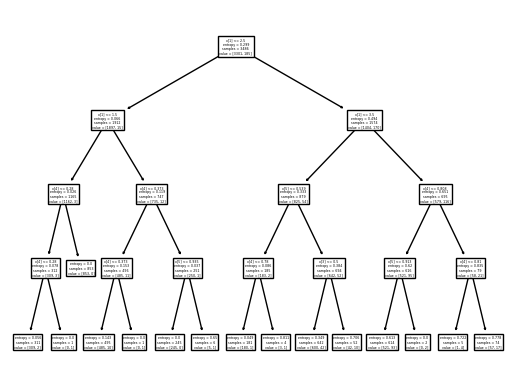

In [33]:
#aumentar tamaño del arbol
#plt.figure(figsize=(20,10))
tree.plot_tree(classTree)
plt.show()

In [34]:
model=KNeighborsClassifier()
model.fit(X_trainset,y_trainset)
prediction2=model.predict(X_testset)
print('The accuracy of the KNN is',metrics.accuracy_score(y_testset,prediction2))

The accuracy of the KNN is 0.9511705685618729


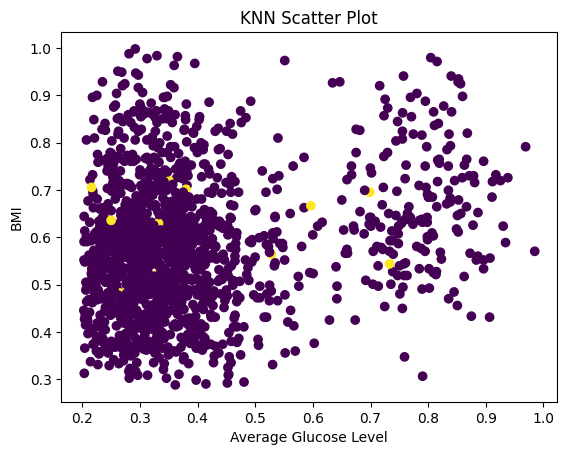

In [35]:
# Import the required libraries
import matplotlib.pyplot as plt

# Plot the KNN using scatter
plt.scatter(X_testset['avg_glucose_level'], X_testset['bmi'], c=prediction2)
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.title('KNN Scatter Plot')
plt.show()


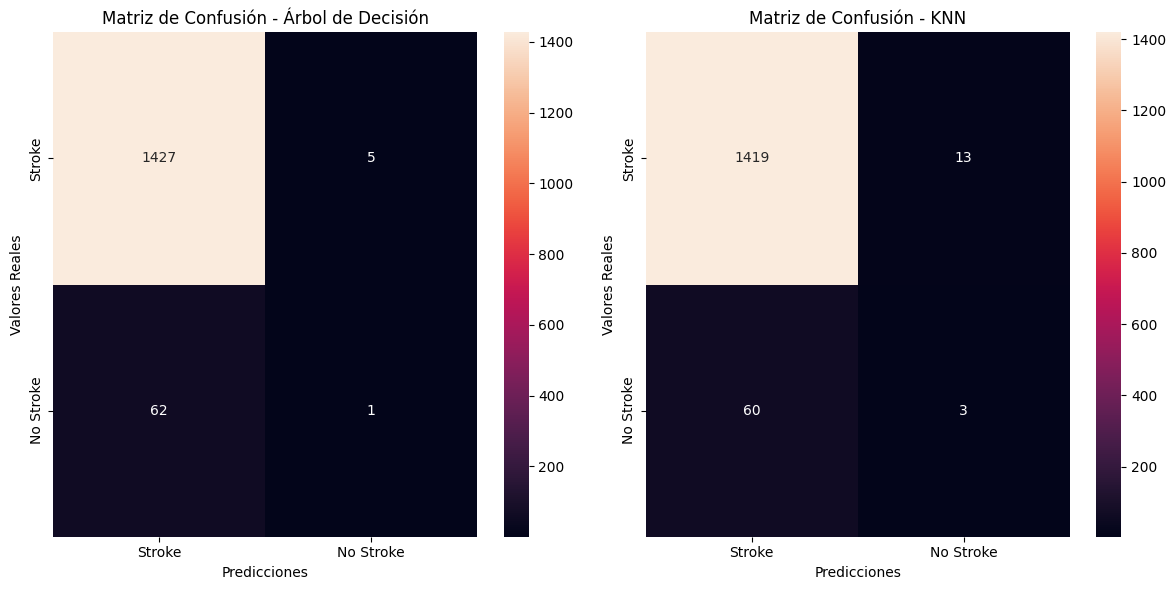

In [36]:
# Matriz de Confusión para el Árbol de Decisión
cm_tree = confusion_matrix(y_testset, predTree)

# Matriz de Confusión para KNN
cm_knn = confusion_matrix(y_testset, prediction2)

# Configurar la visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica del Árbol de Decisión
sns.heatmap(cm_tree, annot=True, fmt="d", xticklabels=['Stroke', 'No Stroke'], yticklabels=['Stroke', 'No Stroke'], ax=axes[0])
axes[0].set_title('Matriz de Confusión - Árbol de Decisión')
axes[0].set_xlabel('Predicciones')
axes[0].set_ylabel('Valores Reales')

# Gráfica de KNN
sns.heatmap(cm_knn, annot=True, fmt="d", xticklabels=['Stroke', 'No Stroke'], yticklabels=['Stroke', 'No Stroke'], ax=axes[1])
axes[1].set_title('Matriz de Confusión - KNN')
axes[1].set_xlabel('Predicciones')
axes[1].set_ylabel('Valores Reales')

plt.tight_layout()
plt.show()


In [37]:
#metricas de rendimiento
from sklearn.metrics import classification_report
print(classification_report(y_testset, predTree))
print(classification_report(y_testset, prediction2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1432
           1       0.17      0.02      0.03        63

    accuracy                           0.96      1495
   macro avg       0.56      0.51      0.50      1495
weighted avg       0.92      0.96      0.94      1495

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1432
           1       0.19      0.05      0.08        63

    accuracy                           0.95      1495
   macro avg       0.57      0.52      0.53      1495
weighted avg       0.93      0.95      0.94      1495



AUC Arbol de Decision: 0.83
AUC KNN: 0.64


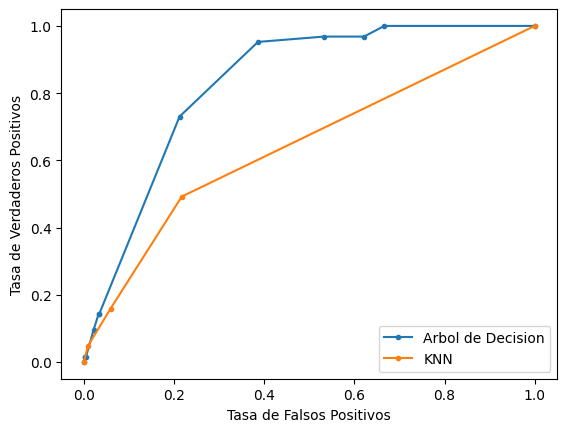

In [38]:
#graficar curva roc para arbol de decision y knn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calcular probabilidades
probs_tree = classTree.predict_proba(X_testset)
probs_knn = model.predict_proba(X_testset)

# Mantener solo las probabilidades positivas
probs_tree = probs_tree[:, 1]
probs_knn = probs_knn[:, 1]

# Calcular AUC
auc_tree = roc_auc_score(y_testset, probs_tree)
auc_knn = roc_auc_score(y_testset, probs_knn)

# Imprimir resultados
print('AUC Arbol de Decision: %.2f' % auc_tree)
print('AUC KNN: %.2f' % auc_knn)

# Calcular curva ROC
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_testset, probs_tree)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_testset, probs_knn)

# Graficar curva ROC
#plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tree, tpr_tree, marker='.', label='Arbol de Decision')
plt.plot(fpr_knn, tpr_knn, marker='.', label='KNN')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

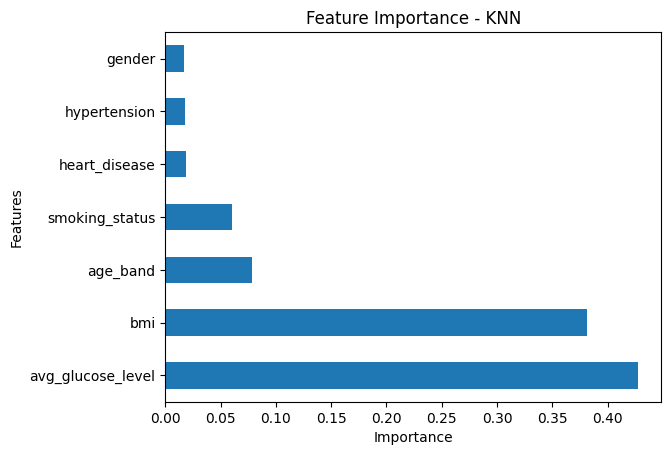

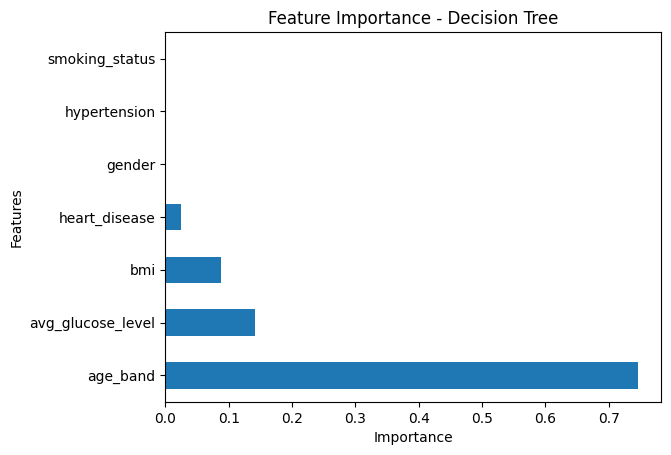

In [39]:
from sklearn.ensemble import ExtraTreesClassifier


# Feature Importance for KNN
model = ExtraTreesClassifier()
model.fit(X, y)
feat_importances_knn = pd.Series(model.feature_importances_, index=X.columns)
feat_importances_knn.nlargest(7).plot(kind='barh')
plt.title('Feature Importance - KNN')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Feature Importance for Decision Tree
feat_importances_tree = pd.Series(classTree.feature_importances_, index=X.columns)
feat_importances_tree.nlargest(7).plot(kind='barh')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Interpretación de Resultados:
Arbol de Decisión:
- Precisión elevada
- Importancia de las características
- Interpretación clara

KNN:
- Precisión elevada
- Sensible a la eleccion de "k"
- No interpretable

# 🧠 Implementación Red Neuronal:

Construir RNA

In [40]:
#Importamos librerias para construir el RNA
import keras
from keras.models import Sequential
from keras.layers import Dense

In [41]:
#Definimos una tabla dummies para convertir variables categoricas
x_dummies = pd.get_dummies(X, drop_first=True)

In [42]:
x_dummies.head()

,gender,age_band,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
0,1,2,0,0,0.407007,0.680982,0
1,1,4,0,0,0.861338,0.689162,1
2,0,0,0,0,0.265990,0.388548,3
3,1,1,0,0,0.327629,0.543967,2
4,0,0,0,0,0.405535,0.445808,3


In [121]:
#Volvemos a entrenar un modelo de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [122]:
#Preprocesamos los conjuntos de datos de entrenamiento y de prubea utilizando StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Entrenamos los datos
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [123]:
#Ininicializamos la red neuronal como una secuencia de capas
classifier = Sequential()

Añadimos capas de entradas y ocultas

In [124]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))

In [126]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))

In [131]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [132]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [133]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [134]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
349/349 [==============================] - 7s 5ms/step - loss: 0.5120 - accuracy: 0.9449
Epoch 2/100
349/349 [==============================] - 2s 5ms/step - loss: 0.2141 - accuracy: 0.9478
Epoch 3/100
349/349 [==============================] - 1s 2ms/step - loss: 0.2020 - accuracy: 0.9478
Epoch 4/100
349/349 [==============================] - 1s 2ms/step - loss: 0.1972 - accuracy: 0.9478
Epoch 5/100
349/349 [==============================] - 1s 2ms/step - loss: 0.1922 - accuracy: 0.9478
Epoch 6/100
349/349 [==============================] - 1s 2ms/step - loss: 0.1887 - accuracy: 0.9478
Epoch 7/100
349/349 [==============================] - 1s 2ms/step - loss: 0.1867 - accuracy: 0.9478
Epoch 8/100
349/349 [==============================] - 1s 2ms/step - loss: 0.1846 - accuracy: 0.9478
Epoch 9/100
349/349 [==============================] - 1s 2ms/step - loss: 0.1829 - accuracy: 0.9478
Epoch 10/100
349/349 [==============================] - 1s 2ms/step - loss: 0.1807 - accura

  # 🔥 Implementación Modelo Regresión Lineal

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [53]:
# Create a logistic regression model
logistic_regression = LogisticRegression()

In [54]:
# Fit the model to the training data
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [55]:
# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1429
           1       0.00      0.00      0.00        66

    accuracy                           0.96      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.91      0.96      0.93      1495



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


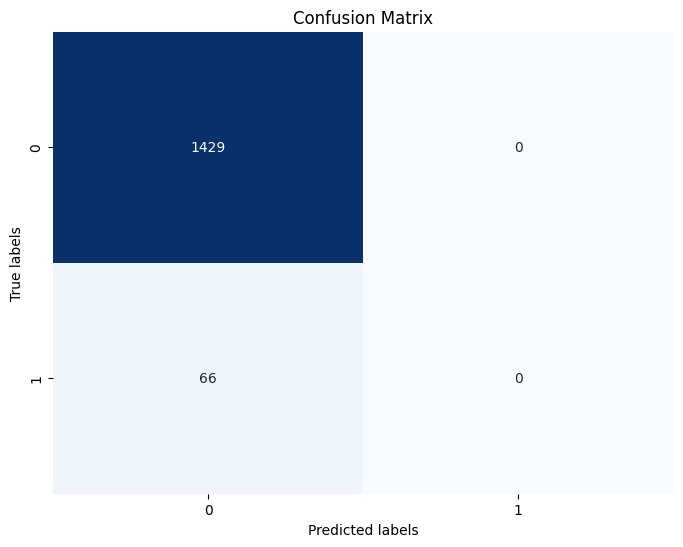

In [57]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [58]:
print(accuracy_score(y_test, y_pred))

0.9558528428093646


In [59]:
from sklearn import linear_model

In [60]:
# Ajustar (entrenar) el clasificador de regresión logística
lgm = linear_model.LogisticRegression(C=1e40, solver='newton-cg')
hw_model = lgm.fit(X_train, y_train)

In [61]:
x_prediction = x_dummies.values

In [62]:
x_prediction

array([[1.        , 2.        , 0.        , ..., 0.4070067 , 0.6809816 ,
        0.        ],
       [1.        , 4.        , 0.        , ..., 0.86133804, 0.68916155,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.26598955, 0.38854806,
        3.        ],
       ...,
       [1.        , 3.        , 0.        , ..., 0.82663575, 0.87525562,
        1.        ],
       [0.        , 3.        , 0.        , ..., 0.39556193, 0.60327198,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.33200854, 0.38241309,
        3.        ]])

In [63]:
# Realizamos predicciones con el modelo entrenado hw_model
Y_train_pred = hw_model.predict(X_train)
Y_test_pred = hw_model.predict(X_test)
y_preddiccion_pred = hw_model.predict(x_prediction)
y_preddiccion_pred

array([0, 1, 0, ..., 1, 1, 0])

In [64]:
# Imprimimos las primeras 150 predicciones generadas utilizando for
for i in range(500):
    if y_preddiccion_pred[i] == 0:
        result = "No Stroke"
    else:
        result = "Stroke"

    print("Paciente", i+1, ":", result)

Paciente 1 : No Stroke
Paciente 2 : Stroke
Paciente 3 : No Stroke
Paciente 4 : No Stroke
Paciente 5 : No Stroke
Paciente 6 : Stroke
Paciente 7 : No Stroke
Paciente 8 : Stroke
Paciente 9 : No Stroke
Paciente 10 : No Stroke
Paciente 11 : No Stroke
Paciente 12 : No Stroke
Paciente 13 : Stroke
Paciente 14 : Stroke
Paciente 15 : Stroke
Paciente 16 : Stroke
Paciente 17 : Stroke
Paciente 18 : No Stroke
Paciente 19 : No Stroke
Paciente 20 : Stroke
Paciente 21 : No Stroke
Paciente 22 : Stroke
Paciente 23 : Stroke
Paciente 24 : Stroke
Paciente 25 : Stroke
Paciente 26 : No Stroke
Paciente 27 : No Stroke
Paciente 28 : No Stroke
Paciente 29 : Stroke
Paciente 30 : Stroke
Paciente 31 : No Stroke
Paciente 32 : Stroke
Paciente 33 : No Stroke
Paciente 34 : Stroke
Paciente 35 : No Stroke
Paciente 36 : No Stroke
Paciente 37 : Stroke
Paciente 38 : No Stroke
Paciente 39 : No Stroke
Paciente 40 : Stroke
Paciente 41 : Stroke
Paciente 42 : Stroke
Paciente 43 : No Stroke
Paciente 44 : No Stroke
Paciente 45 : St

In [65]:
# Se tienen 3 valores de theta

# para theta_0
# Imprimimos el intercept y coefficient de los modelos generados
print (hw_model.intercept_)
print(hw_model.coef_)

[-3.93234491]
[[-0.07374828  1.58021443  0.12719061  0.02575503  0.17421475  0.03686852
  -0.02814739]]


In [104]:
print(" Exactitud (Accuracy) {0:.2f}%\n".format(100*
                        accuracy_score(y_test, Y_test_pred)))

# Muestra la matriz de confusión
print('Matriz de confusión\n')
print(confusion_matrix(y_test, Y_test_pred))

# tn, fp, fn, tp = confusion_matrix(logreg_prediction, Y_test).ravel()
tn, fp, fn, tp = confusion_matrix(y_test,Y_test_pred).ravel()
print ("\nVerdaderos negativos: ", tn)
print ("\nFalsos positivos: ",fp)
print ("\nFalsos negativos: ",fn)
print ("\nVerdaderos positivos: ",tp)

 Exactitud (Accuracy) 95.59%

Matriz de confusión

[[1429    0]
 [  66    0]]

Verdaderos negativos:  1429

Falsos positivos:  0

Falsos negativos:  66

Verdaderos positivos:  0


In [67]:
# Reporte de clasificación
print(classification_report(y_test, Y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1429
           1       0.00      0.00      0.00        66

    accuracy                           0.96      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.91      0.96      0.93      1495



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
# Obtener el puntaje ROC-AUC
print("Puntaje ROC-AUC Regresión Logística {0:.2f}".
         format(roc_auc_score(y_test, Y_test_pred)))

Puntaje ROC-AUC Regresión Logística 0.50


In [102]:
print("Proporción de clases en el conjunto de entrenamiento:")
print(pd.Series(y_trainset).value_counts(normalize=True))
print("\nProporción de clases en el conjunto de prueba:")
print(pd.Series(y_testset).value_counts(normalize=True))


Proporción de clases en el conjunto de entrenamiento:
0    0.946931
1    0.053069
Name: proportion, dtype: float64

Proporción de clases en el conjunto de prueba:
0    0.95786
1    0.04214
Name: proportion, dtype: float64


In [103]:
from imblearn.over_sampling import SMOTE

# Ajustar la proporción al 25% para la clase minoritaria
smote_25 = SMOTE(sampling_strategy=0.25, random_state=0)
X_train_smote_25, Y_train_smote_25 = smote_25.fit_resample(X_trainset, y_trainset)

print("Proporción de clases después de aplicar SMOTE al 25%:")
print(pd.Series(Y_train_smote_25).value_counts(normalize=True))



Proporción de clases después de aplicar SMOTE al 25%:
0    0.800048
1    0.199952
Name: proportion, dtype: float64


In [88]:
from imblearn.over_sampling import SMOTE

# Ajustar la proporción al 30% para la clase minoritaria
smote_30 = SMOTE(sampling_strategy=0.3, random_state=0)
X_train_smote_30, Y_train_smote_30 = smote_30.fit_resample(X_trainset, y_trainset)

print("Proporción de clases después de aplicar SMOTE al 30%:")
print(pd.Series(Y_train_smote_30).value_counts(normalize=True))



Proporción de clases después de aplicar SMOTE al 30%:
0    0.769285
1    0.230715
Name: proportion, dtype: float64


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Ajustar el clasificador de regresión logística con datos balanceados
lgm_smote = LogisticRegression(C=1e40, solver='newton-cg', max_iter=10000)
hw_model_smote = lgm_smote.fit(X_train_smote_25, Y_train_smote_25)

# Hacer predicciones en el conjunto de prueba
Y_test_pred_smote = hw_model_smote.predict(X_testset)

# Evaluar el rendimiento del modelo
print("Exactitud (Accuracy): {0:.2f}%\n".format(100 * accuracy_score(y_testset, Y_test_pred_smote)))

# Matriz de confusión
print('Matriz de confusión\n')
print(confusion_matrix(y_testset, Y_test_pred_smote))

# Reporte de clasificación
print("Reporte de Clasificación:\n")
print(classification_report(y_testset, Y_test_pred_smote))

# Puntaje ROC-AUC
print("Puntaje ROC-AUC: {:.2f}".format(roc_auc_score(y_testset, Y_test_pred_smote)))


Exactitud (Accuracy): 91.30%

Matriz de confusión

[[1340   92]
 [  38   25]]
Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1432
           1       0.21      0.40      0.28        63

    accuracy                           0.91      1495
   macro avg       0.59      0.67      0.62      1495
weighted avg       0.94      0.91      0.93      1495

Puntaje ROC-AUC: 0.67


In [135]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Leer los datos
# Aquí asumimos que ya tienes X_train_smote_25 y Y_train_smote_25 después de aplicar SMOTE
# Si no los tienes, asegúrate de obtenerlos antes de ejecutar este código

# Preprocesamiento de datos
sc = StandardScaler()
X_train_smote_25_scaled = sc.fit_transform(X_train_smote_25)
X_test_scaled = sc.transform(X_testset)

# Inicializar la RNA
classifier = Sequential()

# Añadir capas de entrada y ocultas
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=7))
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compilar la RNA
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar la RNA
classifier.fit(X_train_smote_25_scaled, Y_train_smote_25, batch_size=10, epochs=100)

# Evaluar la RNA en el conjunto de prueba
loss, accuracy = classifier.evaluate(X_test_scaled, y_testset)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')


Epoch 1/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6448 - accuracy: 0.7991
Epoch 2/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5760 - accuracy: 0.8000
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5378 - accuracy: 0.8000
Epoch 4/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5180 - accuracy: 0.8000
Epoch 5/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5083 - accuracy: 0.8000
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5038 - accuracy: 0.8000
Epoch 7/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5018 - accuracy: 0.8000
Epoch 8/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5010 - accuracy: 0.8000
Epoch 9/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5006 - accuracy: 0.8000
Epoch 10/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5005 - accura

In [138]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Hacer predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test_scaled)

# Convertir las probabilidades en clases binarias
y_pred_binary = (y_pred > 0.5).astype(int)

# Calcular la matriz de confusión
cm = confusion_matrix(y_testset, y_pred_binary)
print("Matriz de Confusión:")
print(cm)

# Calcular el puntaje ROC-AUC
roc_auc = roc_auc_score(y_testset, y_pred)
print("Puntaje ROC-AUC:", roc_auc)

# Imprimir el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_testset, y_pred_binary))



47/47 [==============================] - 0s 2ms/step
Matriz de Confusión:
[[1432    0]
 [  63    0]]
Puntaje ROC-AUC: 0.5003491620111732
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1432
           1       0.00      0.00      0.00        63

    accuracy                           0.96      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.92      0.96      0.94      1495



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from keras.layers import Dropout

# Inicializar la RNA
classifier = Sequential()

# Añadir capas de entrada y ocultas
classifier.add(Dense(units=12, kernel_initializer='uniform', activation='relu', input_dim=7))
classifier.add(Dropout(0.3))  # Agregar capa de dropout
classifier.add(Dense(units=12, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(0.3))  # Agregar capa de dropout
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compilar la RNA
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar la RNA con más épocas y un tamaño de lote más grande
classifier.fit(X_train_smote_25_scaled, Y_train_smote_25, batch_size=32, epochs=150)

# Evaluar la RNA en el conjunto de prueba
loss, accuracy = classifier.evaluate(X_test_scaled, y_testset)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

# Hacer predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test_scaled)

# Convertir las probabilidades en clases binarias
y_pred_binary = (y_pred > 0.5).astype(int)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_binary)
print("Matriz de Confusión:")
print(cm)

# Calcular el puntaje ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("Puntaje ROC-AUC:", roc_auc)

# Imprimir el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_binary))


Epoch 1/150
129/129 [==============================] - 2s 4ms/step - loss: 0.5983 - accuracy: 0.7986
Epoch 2/150
129/129 [==============================] - 0s 3ms/step - loss: 0.4181 - accuracy: 0.8000
Epoch 3/150
129/129 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.8000
Epoch 4/150
129/129 [==============================] - 0s 3ms/step - loss: 0.3969 - accuracy: 0.8000
Epoch 5/150
129/129 [==============================] - 0s 4ms/step - loss: 0.3888 - accuracy: 0.8000
Epoch 6/150
129/129 [==============================] - 0s 3ms/step - loss: 0.3871 - accuracy: 0.8000
Epoch 7/150
129/129 [==============================] - 0s 4ms/step - loss: 0.3865 - accuracy: 0.8000
Epoch 8/150
129/129 [==============================] - 0s 4ms/step - loss: 0.3911 - accuracy: 0.8000
Epoch 9/150
129/129 [==============================] - 0s 3ms/step - loss: 0.3851 - accuracy: 0.8000
Epoch 10/150
129/129 [==============================] - 0s 3ms/step - loss: 0.3810 - accura

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import make_scorer, roc_auc_score

# Definir la función para crear el modelo de RNA
def create_model(neurons=6, optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(units=neurons, activation=activation, input_dim=7))
    model.add(Dense(units=neurons, activation=activation))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Leer los datos y dividir en conjunto de entrenamiento y prueba
# Asegúrate de tener X_train_smote_25 y Y_train_smote_25 disponibles
X_train, X_test, y_train, y_test = train_test_split(X_train_smote_25, Y_train_smote_25, test_size=0.3, random_state=42)

# Preprocesar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los parámetros para la búsqueda de hiperparámetros
param_grid = {
    'neurons': [6, 12, 24],
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'sigmoid']
}

# Inicializar las variables para almacenar los mejores resultados
best_score = 0
best_params = {}

# Realizar la búsqueda de hiperparámetros
for neurons in param_grid['neurons']:
    for optimizer in param_grid['optimizer']:
        for activation in param_grid['activation']:
            # Crear y compilar el modelo
            model = create_model(neurons=neurons, optimizer=optimizer, activation=activation)
            # Entrenar el modelo
            model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=0)
            # Calcular el puntaje ROC-AUC
            y_pred_proba = model.predict(X_test_scaled)
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            # Actualizar los mejores resultados si es necesario
            if roc_auc > best_score:
                best_score = roc_auc
                best_params = {'neurons': neurons, 'optimizer': optimizer, 'activation': activation}

# Imprimir los mejores resultados
print("Mejor Puntaje ROC-AUC:", best_score)
print("Mejores Parámetros:", best_params)


39/39 [==============================] - 0s 2ms/step
